In [1]:
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1 - Modeling

In [2]:
# Import data
df_train = pd.read_csv('scaled_train.csv', sep=';')
df_test = pd.read_csv('scaled_test.csv', sep=';')

In [ ]:
# Use standard regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(df_train.drop('prec', axis=1), df_train['prec'])

# Make predictions using the testing set
y_pred = regr.predict(df_test.drop('prec', axis=1))

Coefficients: 
 [-7.54058250e-04  4.60743952e+00  1.52166010e-01 -1.52691266e-01
 -1.56842783e-01 -1.12632312e+00  4.16505018e-01  5.24567098e-01
  9.75103875e-01 -5.53319540e-01  5.65023628e-02 -3.75693160e-02
  7.69855579e-03  3.47354604e-04 -9.82881248e-03 -4.80226102e-02
  2.07244511e-01 -6.63305860e-01 -9.74614614e-02 -1.59192646e-01
 -2.83404268e-01  5.67314933e-01  1.42891467e-02 -2.79555321e-02
 -9.32529423e-02 -8.21011331e-02 -3.79451074e-03]
Mean squared error: 0.76
Variance score: 0.42


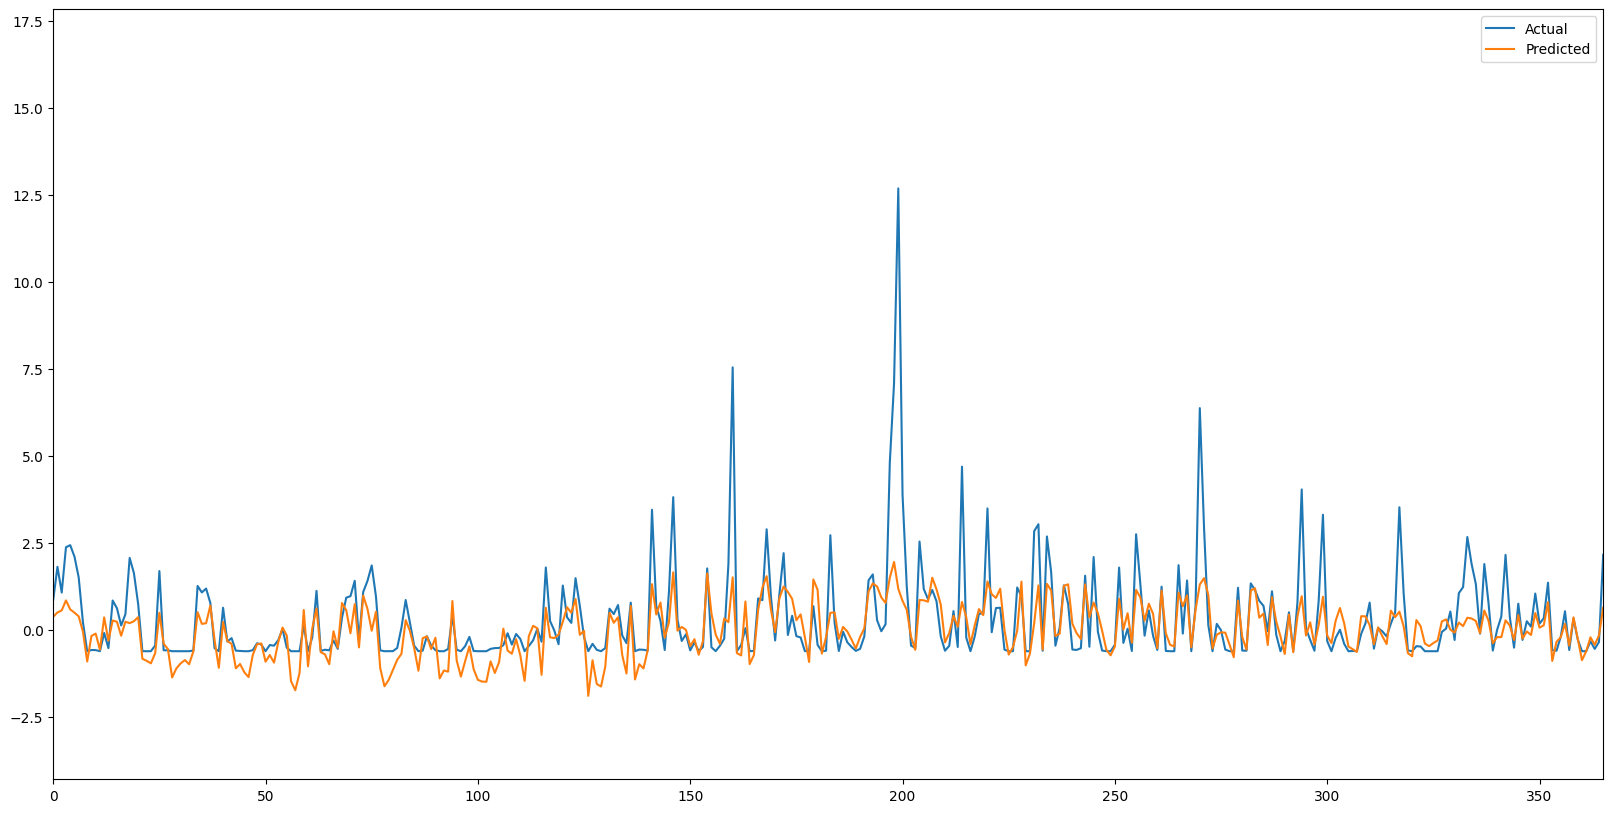

In [8]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The root mean squared error (RMSE), parameter squared=False gives the RMSE
print("Mean squared error: %.2f"
      % mean_squared_error(df_test['prec'], y_pred, squared=False))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_test['prec'], y_pred))

# Plot predictions in time series plot compared to actual values
plt.figure(figsize=(20, 10))
plt.plot(df_test['prec'], label='Actual')
plt.plot(y_pred, label='Predicted')

# Only plot the first year
plt.xlim(0, 365)

plt.legend()

# Step 2 - Feature importance

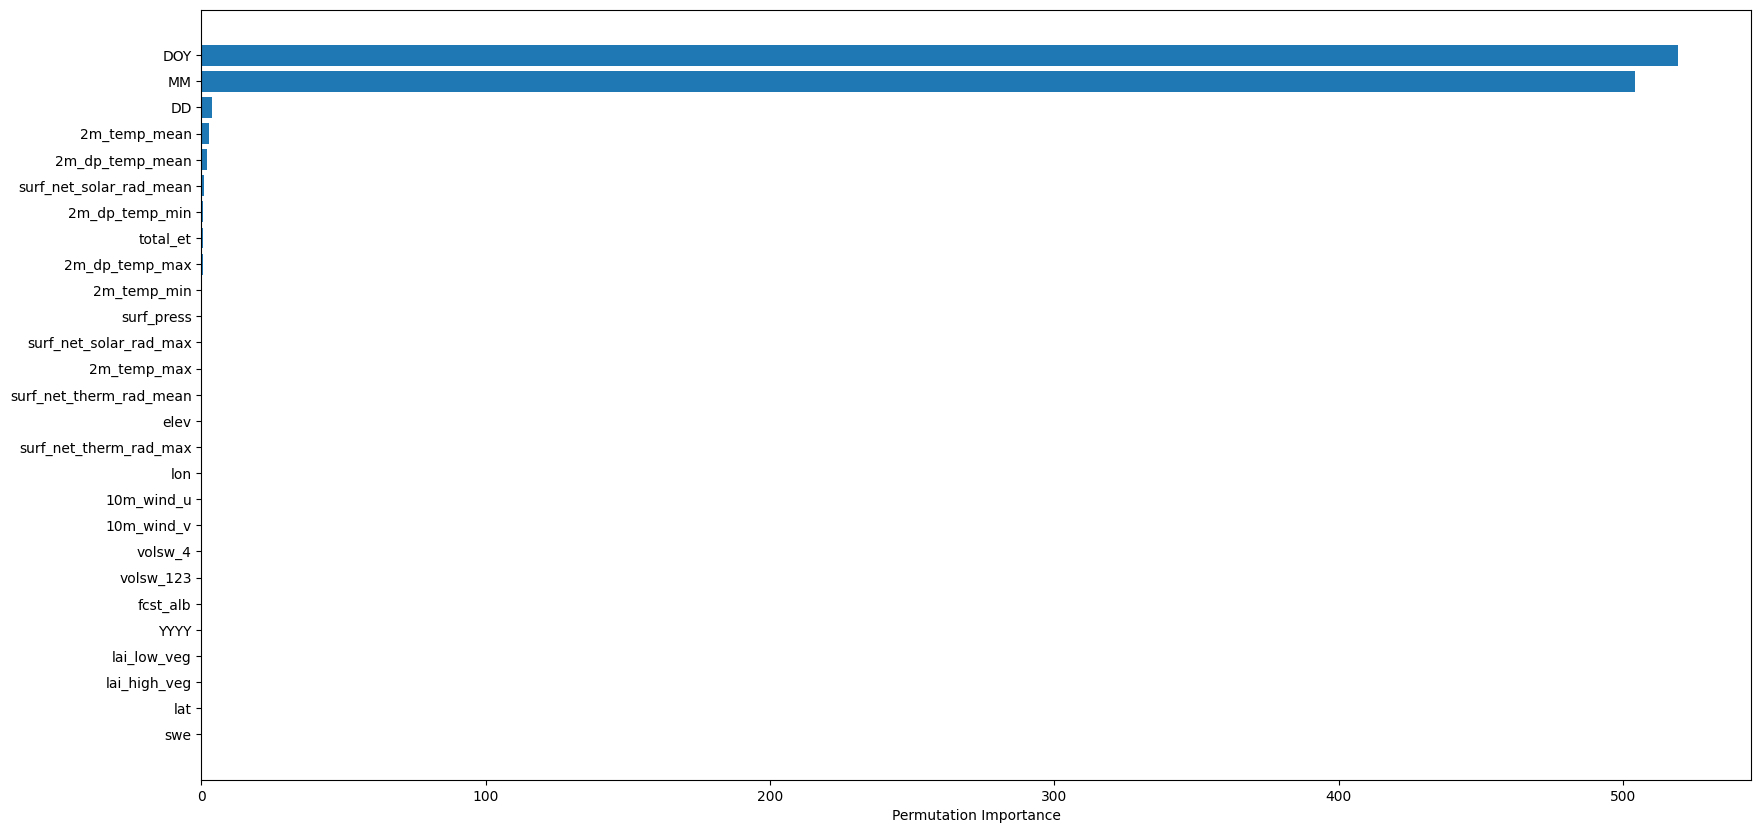

In [12]:
from sklearn.inspection import permutation_importance


perm_importance = permutation_importance(regr, df_test.drop('prec', axis=1), df_test['prec'], n_repeats=10, random_state=42)

# Sort the indices of the permutation importance values
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the permutation importance values
plt.figure(figsize=(20, 10))
plt.barh(df_test.drop('prec', axis=1).columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Add the column names to the plot
plt.yticks(ticks=range(len(df_test.drop('prec', axis=1).columns)), labels=df_test.drop('prec', axis=1).columns[sorted_idx])
plt.show()


Feature: 0, Score: -0.00075
Feature: 1, Score: 4.60744
Feature: 2, Score: 0.15217
Feature: 3, Score: -0.15269
Feature: 4, Score: -0.15684
Feature: 5, Score: -1.12632
Feature: 6, Score: 0.41651
Feature: 7, Score: 0.52457
Feature: 8, Score: 0.97510
Feature: 9, Score: -0.55332
Feature: 10, Score: 0.05650
Feature: 11, Score: -0.03757
Feature: 12, Score: 0.00770
Feature: 13, Score: 0.00035
Feature: 14, Score: -0.00983
Feature: 15, Score: -0.04802
Feature: 16, Score: 0.20724
Feature: 17, Score: -0.66331
Feature: 18, Score: -0.09746
Feature: 19, Score: -0.15919
Feature: 20, Score: -0.28340
Feature: 21, Score: 0.56731
Feature: 22, Score: 0.01429
Feature: 23, Score: -0.02796
Feature: 24, Score: -0.09325
Feature: 25, Score: -0.08210
Feature: 26, Score: -0.00379


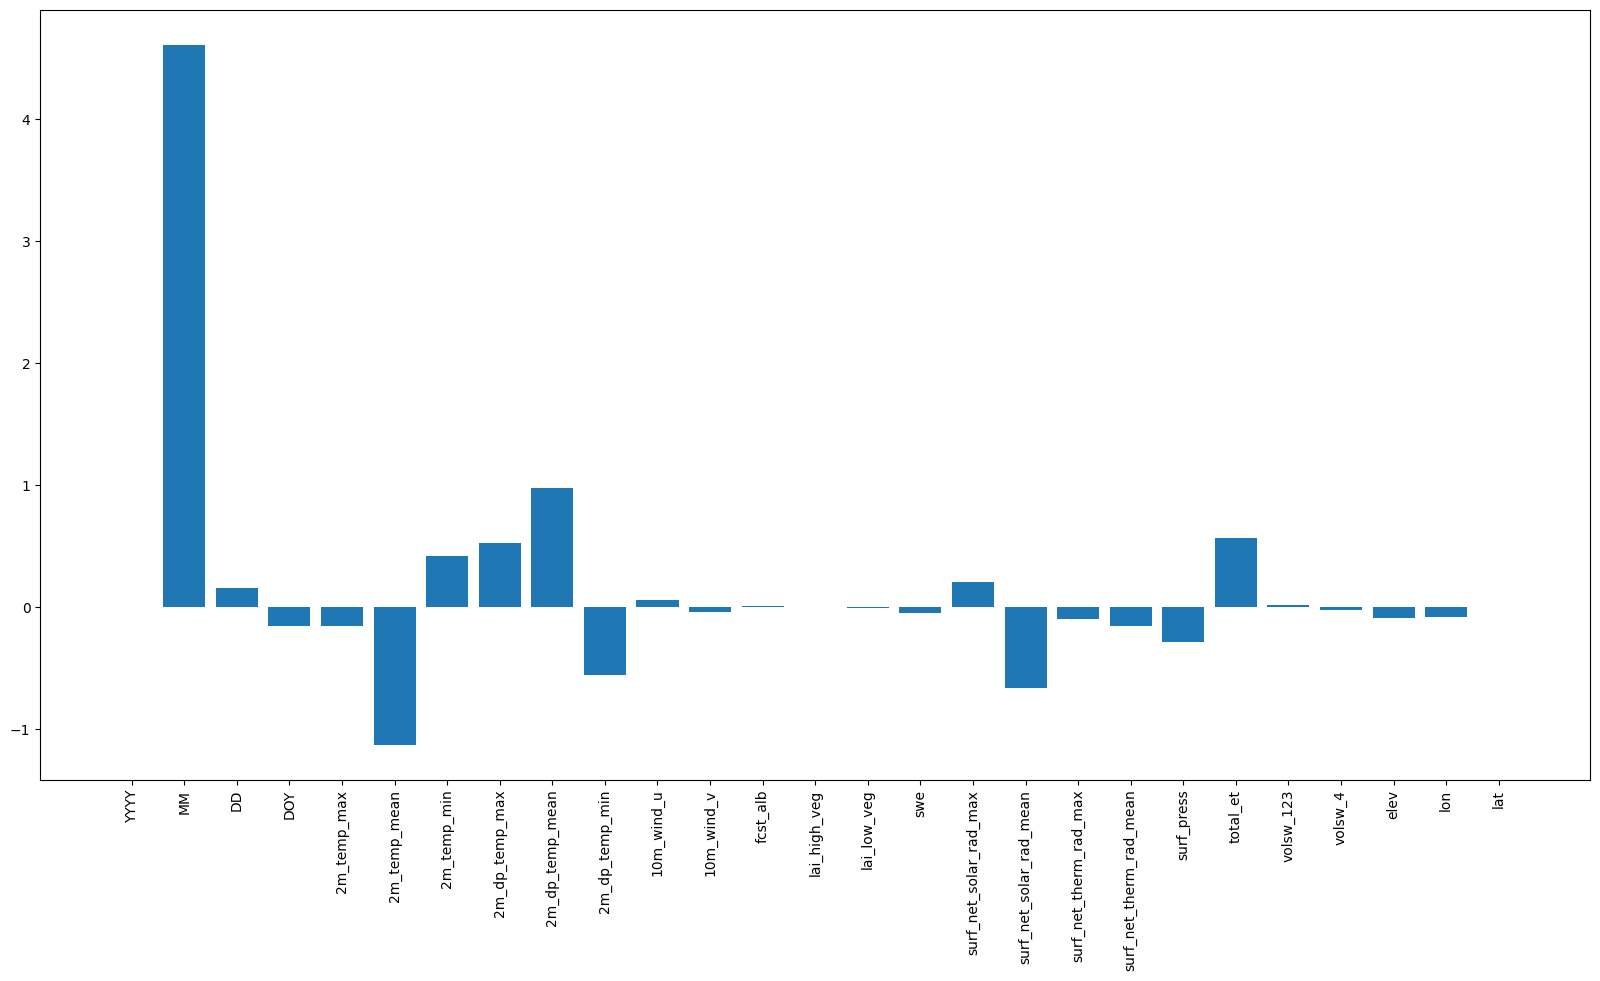

In [11]:
# Get feature importance
importance = regr.coef_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Plot feature importance by its index name
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], df_train.drop('prec', axis=1).columns,  rotation='vertical')
plt.show()